# Frequent Itemsets and Association Rules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import fpgrowth, fpmax, association_rules


## (a)

In [2]:
data = pd.read_csv('./frequent_itemsets_and_association_rules/online_retail.csv', sep=';', decimal=',')
display(data.head())
display(data.info())

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536370,ALARM CLOCK BAKELIKE PINK,24,01.12.2010 08:45,3.75,12583.0,France
1,536370,ALARM CLOCK BAKELIKE RED,24,01.12.2010 08:45,3.75,12583.0,France
2,536370,ALARM CLOCK BAKELIKE GREEN,12,01.12.2010 08:45,3.75,12583.0,France
3,536370,PANDA AND BUNNIES STICKER SHEET,12,01.12.2010 08:45,0.85,12583.0,France
4,536370,STARS GIFT TAPE,24,01.12.2010 08:45,0.65,12583.0,France


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29313 entries, 0 to 29312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      29313 non-null  int64  
 1   Itemname    29313 non-null  object 
 2   Quantity    29313 non-null  int64  
 3   Date        29313 non-null  object 
 4   Price       29313 non-null  float64
 5   CustomerID  29208 non-null  float64
 6   Country     29313 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


None

The total sales value is:  983566.6499999999
The top tree items with the heighest sales value: 
 Itemname
POSTAGE                     59489.5
REGENCY CAKESTAND 3 TIER    18961.8
RABBIT NIGHT LIGHT          18836.0
Name: Sales, dtype: float64


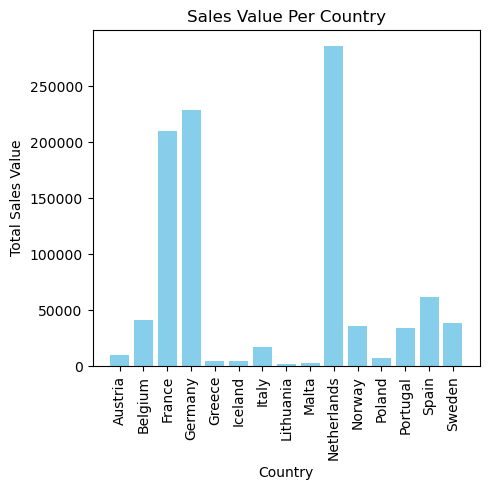

In [9]:
# Your code here

# monetary value
monetaryValueData = data[['Quantity', 'Price', 'Itemname', 'Country']].copy()
monetaryValueData['Sales'] = monetaryValueData['Quantity']*monetaryValueData['Price']
monetaryValue = monetaryValueData['Sales'].sum()

print("The total sales value is: ", monetaryValue)

# items with the highest sales value
highestSales = monetaryValueData.groupby('Itemname')['Sales'].sum().nlargest(3)

print("The top tree items with the heighest sales value: \n",  highestSales)

# plot showing the sales value per country
CountrySales = monetaryValueData.groupby('Country')['Sales'].sum().reset_index()

plt.figure(figsize=(5, 5))
plt.bar(CountrySales['Country'], CountrySales['Sales'], color='skyblue')

plt.xlabel('Country')
plt.ylabel('Total Sales Value')
plt.title('Sales Value Per Country')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

## (b)

In [10]:
# Create a transaction for each BillNo
transactions = data.groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().fillna(0).astype(bool)
transaction_attributes = data.groupby('BillNo')[['Date', 'CustomerID', 'Country']].first()
display(transactions.head())
display(transaction_attributes.head())
n_transactions = transactions.shape[0]

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,...,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536403,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536527,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536840,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


,Date,CustomerID,Country
BillNo,,,
536370,01.12.2010 08:45,12583.0,France
536403,01.12.2010 11:27,12791.0,Netherlands
536527,01.12.2010 13:04,12662.0,Germany
536532,01.12.2010 13:24,12433.0,Norway
536840,02.12.2010 18:27,12738.0,Germany


Number of transactions:  1357
The three common items and their support are: 
Item:  POSTAGE  Support:  0.7243920412675019
Item:  ROUND SNACK BOXES SET OF4 WOODLAND  Support:  0.19602063375092116
Item:  REGENCY CAKESTAND 3 TIER  Support:  0.13706705969049374


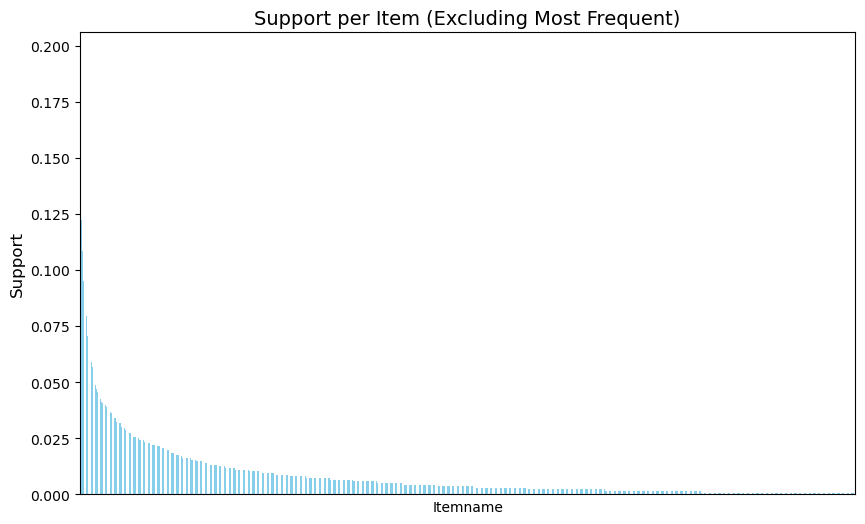

In [14]:
# Your code here
# number of transactions
print("Number of transactions: ", n_transactions)

# three most common items
commonItems = transactions.sum().sort_values(ascending=False).head(3)
itemNames = commonItems.index.tolist()
print("The three common items and their support are: ")
for item, count in zip(itemNames, commonItems):
    print("Item: ", item, " Support: ", count / n_transactions)

# bar chart support per item
item_support = transactions.sum() / n_transactions
item_support_sorted = item_support.sort_values(ascending=False).iloc[1:]

plt.figure(figsize=(10, 6))
item_support_sorted.plot(kind='bar', color='skyblue')
plt.xticks([]) 
plt.title('Support per Item (Excluding Most Frequent)', fontsize=14)
plt.ylabel('Support', fontsize=12)
plt.show()

## (c)
The three most frequently occurring items across all transactions differ from the three items that generate the highest sales value. This is because a more expensive item can generate a higher sales value even with fewer purchases than a cheaper item with a higher purchase frequency.


## (d)

In [177]:
# Your code here

# calculate frequent itemset with a minimum support of 1%
frequentItemsets = fpgrowth(transactions, min_support=0.01, use_colnames=True)

# the three most frequent itemsets, which have at least three items
frequentItemsetsFiltered = frequentItemsets[frequentItemsets['itemsets'].apply(len) >= 3]
frequentItemsetsTopThree = frequentItemsetsFiltered.sort_values(by='support', ascending=False).head(3)
print("The three most frequent itemsets which include at least three items are: \n", frequentItemsetsTopThree)

The three most frequent itemsets which include at least three items are: 
        support                                           itemsets
2058  0.080324  (POSTAGE, ROUND SNACK BOXES SET OF4 WOODLAND, ...
978   0.053795  (PLASTERS IN TIN CIRCUS PARADE, PLASTERS IN TI...
1004  0.050847  (PLASTERS IN TIN SPACEBOY, PLASTERS IN TIN WOO...


## (e)

In [174]:
# Your code here

# maximal frequent itemsets with a minimum support of 1%
maxFrequentItemset = fpmax(transactions, min_support=0.01, use_colnames=True)

# the three most maximum frequent itemsets, which have at least three items
maxFrequentItemsetsFiltered = maxFrequentItemset[maxFrequentItemset['itemsets'].apply(len) >= 3]
maxFrequentItemsetsTopThree = maxFrequentItemsetsFiltered.sort_values(by='support', ascending=False).head(3)
print("The three most frequent itemsets which include at least three items are: \n", maxFrequentItemsetsTopThree)

# compare the three most frequent maximal itemsets including at least three items and their support to the resulting itemsets of part d)
print("""Since d) only considers frequent itemsets, it is possible that itemsets that are not maximal are also considered. These can therefore not be taken into account in e). Since maximum frequent itemsets are usually larger than frequent itemsets, they usually also have a lower support. This can be seen by comparing the top three itemsets of d) and e). Even if both have exactly three items, the support of the itemsets in d) is higher. Since the support in e) is lower for each itemset, it can be assumed that the top three itemsets in d) are not maximal and can be found in a larger frequent itemset.""")

The three most frequent itemsets which include at least three items are: 
        support                                           itemsets
1984  0.022108  (RABBIT NIGHT LIGHT, RED TOADSTOOL LED NIGHT L...
1983  0.020634  (RABBIT NIGHT LIGHT, POSTAGE, ROUND SNACK BOXE...
1177  0.020634  (RED  HARMONICA IN BOX, BLUE HARMONICA IN BOX,...
Since d) only considers frequent itemsets, it is possible that itemsets that are not maximal are also considered. These can therefore not be taken into account in e). Since maximum frequent itemsets are usually larger than frequent itemsets, they usually also have a lower support. This can be seen by comparing the top three itemsets of d) and e). Even if both have exactly three items, the support of the itemsets in d) is higher. Since the support in e) is lower for each itemset, it can be assumed that the top three itemsets in d) are not maximal and can be found in a larger frequent itemset.


## (f)

In [181]:
# Get all frequent items with at least 6 items
at_least_six_items = frequentItemsets[frequentItemsets['itemsets'].apply(len).ge(6)]

# Group the itemsets by length and count the number of itemsets, closed itemsets and maximal frequent itemsets
grouped = at_least_six_items['itemsets'].apply(len).value_counts().sort_index()
# Itemset is closed if there is no proper superset with the same support
closed_itemsets = at_least_six_items[at_least_six_items.apply(lambda x: all(not (set(x['itemsets']).issubset(set(y['itemsets'])) and x['support'] == y['support']) for _, y in at_least_six_items.iterrows() if x['itemsets'] != y['itemsets']), axis=1)]
maximal_itemsets = maxFrequentItemset[maxFrequentItemset['itemsets'].apply(len).ge(6)]


print(grouped.keys()[0])

result = pd.DataFrame({
    'Number of itemsets': grouped,
    'Number of closed itemsets': closed_itemsets['itemsets'].apply(len).value_counts().sort_index(),
    'Number of maximal itemsets': maximal_itemsets['itemsets'].apply(len).value_counts().sort_index()
}).fillna(0).astype(int)

display(result)

6


,Number of itemsets,Number of closed itemsets,Number of maximal itemsets
itemsets,,,
6,8,5,1
7,1,1,1


## (g)

                                            antecedents  \
0                  (ROUND SNACK BOXES SET OF4 WOODLAND)   
1                                  (SPACEBOY LUNCH BOX)   
2                                  (SPACEBOY LUNCH BOX)   
3                         (SPACEBOY LUNCH BOX, POSTAGE)   
4     (SPACEBOY LUNCH BOX, ROUND SNACK BOXES SET OF4...   
...                                                 ...   
5691  (MINI LIGHTS WOODLAND MUSHROOMS, RABBIT NIGHT ...   
5692  (MINI LIGHTS WOODLAND MUSHROOMS, RED TOADSTOOL...   
5693  (MINI LIGHTS WOODLAND MUSHROOMS, RED TOADSTOOL...   
5694                    (TRADTIONAL ALPHABET STAMP SET)   
5695                    (TRADTIONAL ALPHABET STAMP SET)   

                               consequents  antecedent support  \
0                                (POSTAGE)            0.196021   
1                                (POSTAGE)            0.121592   
2     (ROUND SNACK BOXES SET OF4 WOODLAND)            0.121592   
3     (ROUND SNACK BOXES SE

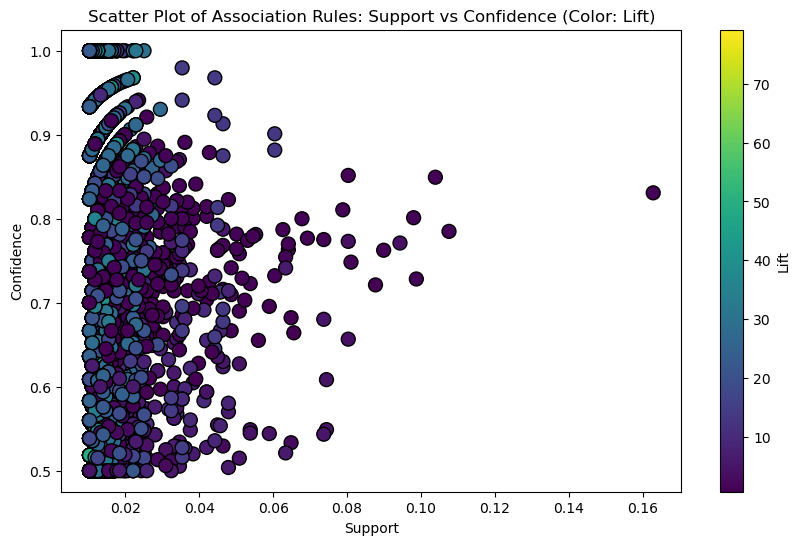

In [58]:
# Your code here
# determine all association rules based on frequentItemsets
associationRules = association_rules(frequentItemsets, metric="confidence", min_threshold=0.5, num_itemsets= n_transactions)

# plot
plt.figure(figsize=(10, 6))
plt.scatter(associationRules['support'], associationRules['confidence'], c=associationRules['lift'], cmap='viridis', edgecolors='k', s=100)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter Plot of Association Rules: Support vs Confidence (Color: Lift)')
plt.show()

## (h)

In [53]:
# Your code here
associationRulesCopy = associationRules.copy()

# association rule with the highest lift
highestLift = associationRulesCopy.sort_values(by='lift', ascending=False).head(1)

print("Association Rule with highest Lift")
print("Antecedents: ", ', '.join(str(item) for item in highestLift['antecedents']))
print("Consequents: ", ', '.join(map(str, highestLift['consequents'])))
print("Lift: ", highestLift['lift'].values)
print("Support: ", highestLift['support'].values)
print("Confidence: ", highestLift['confidence'].values)
print()

# association rule with the lowest lift
print("Association Rule with lowest Lift")
lowestLift = associationRulesCopy.sort_values(by='lift', ascending=True).head(1)
print("Antecedents: ", ', '.join(str(item) for item in lowestLift['antecedents']))
print("Consequents: ", ', '.join(map(str, lowestLift['consequents'])))
print("Lift: ", lowestLift['lift'].values)
print("Support: ", lowestLift['support'].values)
print("Confidence: ", lowestLift['confidence'].values)
print()

print(""" A lift above 1 represents a positive correlation and a lift below 1 represents a negative correlation.
As both supports are relativly low, it shows that both rules does only apply to a fraction of the dataset.
The confidence descripes the likelihood of the consequents being puchased when the antecedents where purchased, as both are above or equal 0.5 it choose a good rule.""")


Association Rule with highest Lift
Antecedents:  frozenset({'DOLLY GIRL CHILDRENS BOWL', 'CHILDRENS CUTLERY DOLLY GIRL'})
Consequents:  frozenset({'DOLLY GIRL CHILDRENS CUP', 'CHILDRENS CUTLERY SPACEBOY'})
Lift:  [79.15833333]
Support:  [0.01031688]
Confidence:  [0.875]

Association Rule with lowest Lift
Antecedents:  frozenset({'LUNCH BAG RED RETROSPOT', 'LUNCH BAG SUKI DESIGN'})
Consequents:  frozenset({'POSTAGE'})
Lift:  [0.69023398]
Support:  [0.01252763]
Confidence:  [0.5]



## (i)

In [165]:
# Your code here

print(""" As a minimum lift value 1 would be recommended, as a value less than 1 represents a negative corraltion. These are not interesting for the retailer. A value greater 1 represents a positive
correlation. """)
print(""" As minimum confidence at least 0.5 is recommended, as it says that in 50 percent the consequents are purchased, when the antecedents where purchased. Hence rules with a lower confidence are not interesting for the retailer.""")


 As a minimum lift value 1 would be recommended, as a value less than 1 represents a negative corraltion. These are not interesting for the retailer. A value greater 1 represents a positive
correlation. 
 As minimum confidence at least 0.5 is recommended, as it says that in 50 percent the consequents are purchased, when the antecedents where purchased. Hence rules with a lower confidence are not interesting for the retailer.


## (j)

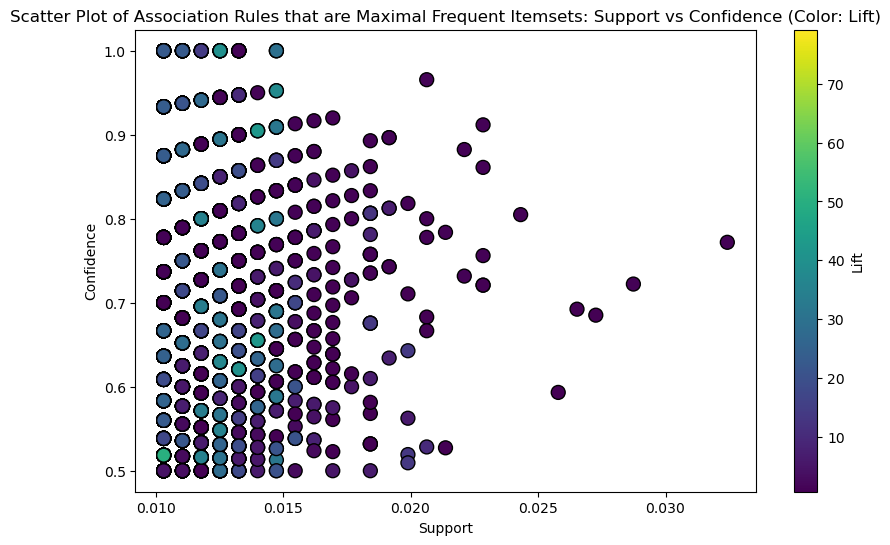

In [125]:
rules = associationRules.copy()

rules['antecedentsF'] = rules['antecedents'].apply(lambda x: set(x)) 
rules['consequentsF'] = rules['consequents'].apply(lambda x: set(x)) 

# Combine antecedents and consequents into a single itemset
rules['combinedItemset'] = rules.apply(lambda row: row['antecedentsF'].union(row['consequentsF']), axis=1)

filteredRules = [] 

for i in range(len(rules)):
    currentSet = rules['combinedItemset'][i]
    #print(set(maxFrequentItemset[0]))
    found = False
    for j in range(len(maxFrequentItemset)):
        if currentSet == set(maxFrequentItemset['itemsets'][j]):
            found = True
            break
    if found:
        filteredRules.append(rules.iloc[i])
filteredRules_df = pd.DataFrame(filteredRules)

plt.figure(figsize=(10, 6))
plt.scatter(filteredRules_df['support'], filteredRules_df['confidence'], c=filteredRules_df['lift'], cmap='viridis', edgecolors='k', s=100)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter Plot of Association Rules that are Maximal Frequent Itemsets: Support vs Confidence (Color: Lift)')
plt.show()

In [130]:
# maximum values of support, confidence, and lift befor filtering
max_support = associationRules['support'].max()
max_confidence = associationRules['confidence'].max()
max_lift = associationRules['lift'].max()

print("Maximum support before filtering: ", max_support)
print("Maximum confidence before filtering: ", max_confidence)
print("Maximum lift before filtering: ", max_lift)
print()

# maximum values of support, confidence, and lift after filtering 

max_support = filteredRules_df['support'].max()
max_confidence = filteredRules_df['confidence'].max()
max_lift = filteredRules_df['lift'].max()

print("Maximum support after filtering: ", max_support)
print("Maximum confidence after filtering: ", max_confidence)
print("Maximum lift after filtering: ", max_lift)
print()


print(""" As expected the maximum support is lower after filtering, as maximum frequent itemsets have a lower support (see e) for further explaination). 
The maximum confidence and lift did not change""")

Maximum support before filtering:  0.16285924834193072
Maximum confidence before filtering:  1.0
Maximum lift before filtering:  79.15833333333333

Maximum support after filtering:  0.032424465733235076
Maximum confidence after filtering:  1.0
Maximum lift after filtering:  79.15833333333333

 As expected the maximum support is lower after filtering, as maximum frequent itemsets have a lower support (see e) for further explaination). 
The maximum confidence and lift did not change
